Note on length of analysis: In order to incorporate elaborate graphs on all combinations of clustering and dimensionality reduction, I used 11 pages, please take note and kindly review.

Note on positions of figures: Due to large number of figures in part 3 (Clustering reproduction on Dimensionality-reduced data), latex could not adjust them in the same section, please look at the title of the plot to follow, iris plots follow after the section for part 4 (Neural Network on Dimensionality-reduced data), and the plot for part 4 can be found at the very end (after conclusion).

In [1]:
from assignment3 import *

# Dataset Discussion

The two datasets used are:

- Handwritten digits (NIST), reused from Assignment 1
- Iris dataset, newly used dataset

The reasons of choosing these two datasets are:

1. The Digits dataset as explained in Assignment 1 is one standard dataset for machine learning problems, so it will be interesting to see how it will exhibit in various clustering and dimensionality reduction treatments. Futhermore, as a multiclass ($10$ classes) dataset, clustering can be made complex to reveal how digits are clustered by their features; this is also a rather high-dimensionality ($64$ features) dataset, so dimensionality reduction would probably hint at useful insights in extracting or transforming sufficient features.
2. The Iris dataset on the other hand is a rather small ($150$ examples, $4$ featurs, $3$ classes) dataset, which is quite the opposite to the Digits dataset. Seeing how they differ in clustering and dimensionality reduction results would be useful in showing how the complexity of the dataset might attribute to the success of those procedures. This dataset is also widely used in the machine learning community for various educational needs, so it would also be representative.

# Clustering

Two clustering algorithms are analysed:

- K-Means
- EM: Expectation Maximisation

We first perform clustering (by KMeans) on a dataset (Digits Dataset) to obtain a confusion matrix, detailing where each example is clustered to as well as what that example is supposed to be classified into (by the provided target label), the heatmap help visualise where do those examples distribute - this is used to also evaluate the accuracy score as if the clusters are the prediction against the target labels. Secondly we provide a visualisation of the clusters by passing the clustered data into an immediate PCA projector, so that the examples can be plotted in 2D space composed of the most prominent components from PCA, with the colour code signifying the cluster each example is assigned to.

Then this is repeated for the second (the Iris) dataset. Then the above are altogether repeated for the second clustering algorithm (EM).

**Choice of $k$**: Naturally, the number of classes are chosen to be the number of clusters $k$, because as a labelled dataset for classification that would be ultimately goal. Though we might select $k$ in terms of number of latent features that would span the resultant classes, that would not be as interpretable.

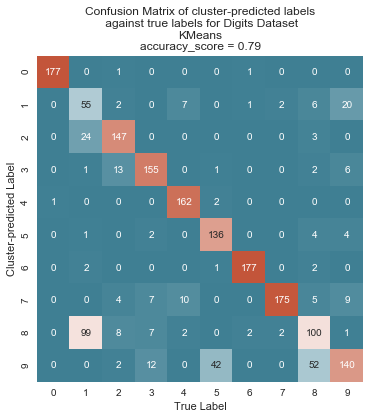

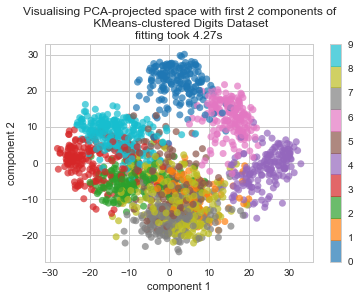

In [3]:
kmeans(solver.digits, confmat=True, vis=True, n_init=100, method_desc='KMeans-clustered')

For KMeans on the digits dataset, 79% accuracy is achieved just by KMeans, which is pretty impressive compared to the neural network classifier from Assignment 1 (98%), because it takes very little time (4.27s) in constrast to the training time of a neural network while performing reasonably well. Note that most of the error comes from misclassifying `1` as `8`, `5` as `9`, and `8` as `9`, but accounting for that they do look similar at a pixelated level. The visualisation sees that digits `0`, `4`, `6` are well separated from the other digits, and the digits tend to claim their own territory without much mixing up, so clustering was quite successful in that digits generally line up naturally with the classes.

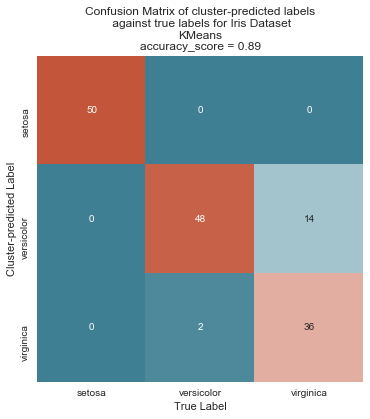

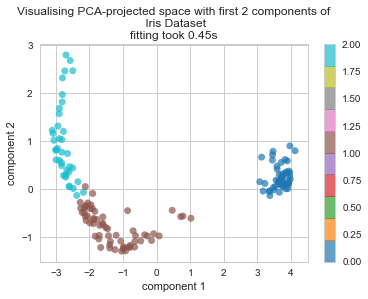

In [4]:
kmeans(solver.iris, confmat=True, vis=True)

For KMeans on ths iris dataset, having achieved 89% accuracy and largely separated iris class 0 from the other two in the visualisation are good. Most errors come from mistaking virginica as veriscolor, and indeed in the visualisation, these two latter classes share a beltline of clusters, difficult to draw a boundary to tell them apart.

**The EM algorithm** have a parameter `covariance_type` in the `scikit-learn` package implementation as Gaussian Mixture Model. Note that we are applying gaussians as the underlying densities for EM in this case, which makes sense because gaussians represents that we do not have prior belief in the data distribution and just comply with Central Limit Theorem.

The 4 covariance types are tested in each dataset, and based on this choice, the accuracy of cluster-to-target are found and shown.

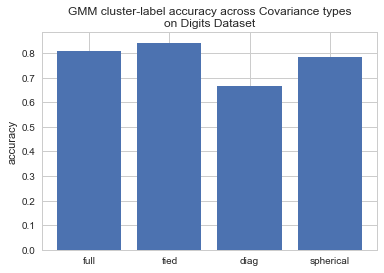

In [5]:
em(solver.digits, main=False, comp_covariance_type=True)

For digits, `tied` works best, where all components share the same general covariance matrix, so each cluster uses an identical 'radius' in each dimension, so imagine the fixed-shaped gaussian being copied over to various spots to capture the pattern of each cluster. As digits as images are quite homogeneous, it makes intuitive sense to reuse the covariances to model the digits.

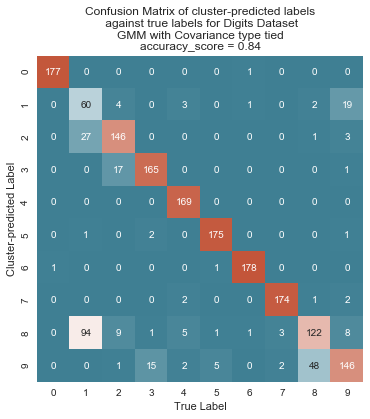

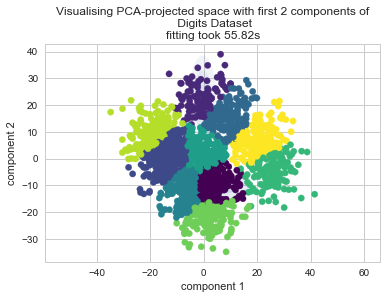

In [6]:
em(solver.digits, confmat=True, covariance_type='tied', vis=True)

EM runs with improved accuracy (84%) but significantly longer running time (55.82s). Notice that the number of misclassifed `1`-as-`8` decreased from KMeans's `99` to `94` here, showing the strength of soft probability assignment over hard cluster assignment in KMeans, to resolve more ambiguous cases accurately. The visusalisation also shows 10 clusters each occupying its own area in the space to discriminate against one another.

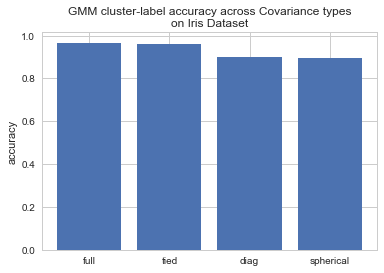

In [3]:
em(solver.iris, main=False, comp_covariance_type=True)

For EM on iris, `full` and `tied` works better with `full` winning, meaning that fine-tune adjustments of covariances for each components is useful, because `full` allows each component to have an independent covariance matrix, so that it can improve upon the single `tied` covariance matrix.

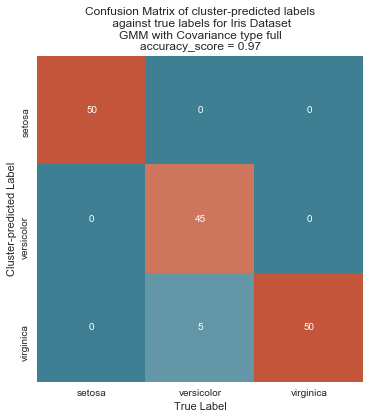

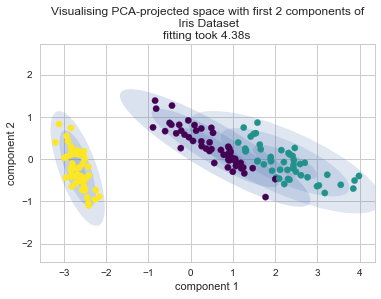

In [7]:
em(solver.iris, confmat=True, vis=True)

EM runs with 97% accuracy, very high for a clustering-only classifiation. The unclear distinction between versicolor and virginica are much better handled by the gaussians (shown in visualisation as shades of standard deviation away from means/centers), so that the number of misclassification gets down to merely 5.

Overall for clustering algorithms, KMeans provides a quick estimate while EM gives precision with time cost, given that the right covariance type is used.

# Dimensionality Reduction

Four dimensionality reduction algorithms are analysed:

- PCA: Principle Component Analysis
- ICA: Independent Component Analysis
- RP: Randomised Projection
- NMF: Nonnegative Matrix Factorisation

**PCA**: aims to find the orthogonal basis set of features that amongst which maximises variance, and the relative importance of features are ranked by their eigenvalues. **Distribution of eigenvalues across components** thus become of interest.

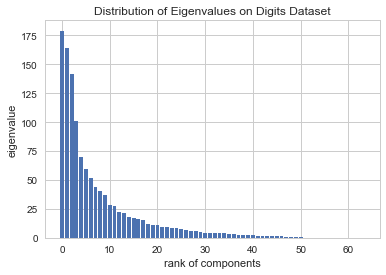

In [5]:
pca(solver.digits, 1, use_components_percent=True, eigen=True)

The digits dataset has 4 features whose eigenvalues are outstanding (over 100), suggesting that they are perhaps important features. The other features continue to decline in importance (eigenvalue), till from the 40th component onwards, their eigenvalue becomes insignificant, hinting at that those corresponding pixels in the image do not show variance and considered not useful in the PCA setup.

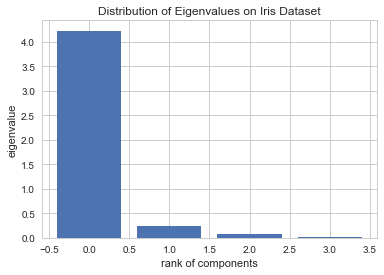

In [6]:
pca(solver.iris, 1, use_components_percent=True, eigen=True)

This is more evident in the iris dataset, where only one component's eigenvalue dominates.

0.3 of components are 19 components


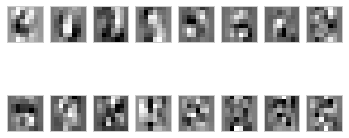

In [5]:
# pca(solver.digits, 0.4, use_components_percent=True, eigen=True)
pca(solver.digits, 0.3, use_components_percent=True, vis_components=True)
# pca(solver.digits, 0.5, use_components_percent=True, vis_components=True)
# pca(solver.digits, 0.7, use_components_percent=True, vis_components=True)

To illutrate what PCA captured, the top 30% of the digit dataset components are extracted and plotted as image. Darker colour corresponds to higher weight of the component in the transformed space, so we can think of these images showing small detectors of the darker patterns in the image. Indeed we can see some curvy dark patches, suggesting that they are detecting specific curved parts of digits like `8` and `6`. White regions are pixels not activated, that is for example the hollow regions in `8` and `6`. We can see some of them are captured, but not as precisely.

What is noteworthy is that PCA usually runs for around 2 seconds, so it is ideal for quick visualisation and feature extraction.

**ICA** adopts a different optimisation objective than PCA, to maximise pairwise mutual information with a statistically independent basis set of features, with maximised non-gaussianity. We measure kurtosis here for non-gaussianity, which would also minimise information loss. The **distribution of kurtosis** is investigated here. Note that the following plots have a y-axis of `kurtosis - 3` in order to find out how different a component is to a gaussian. `0` implies sameness as gaussian. Positive and negative kurtosis gives differen directions of non-gaussianity, but absolutely spearking they are the same, so we sort components with their absolute value of kurtosis minus 3, note though the components do not naturally have an order.

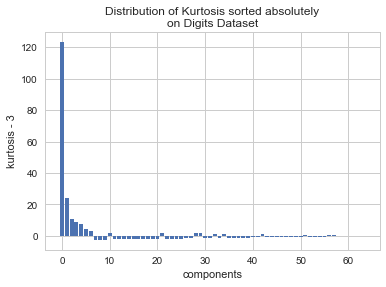

In [12]:
ica(solver.digits, 1, use_components_percent=True, kurto=True)

For digits, one feature has an extremely high positive non-gaussianity, which would probably serve as a good discriminative feature.

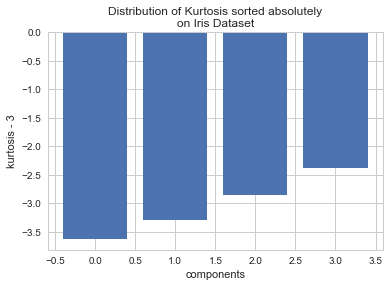

In [13]:
ica(solver.iris, 1, use_components_percent=True, kurto=True)

For iris, kurtosis-minus-3 of components line up rather closely, but they are all negative, giving fatter-tail (both left and right side) distributions for better discrimination.

0.3 of components are 19 components


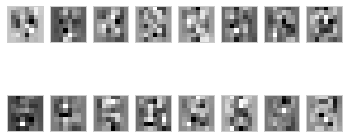

In [6]:
ica(solver.digits, 0.3, use_components_percent=True, vis_components=True)
# ica(solver.digits, 0.5, use_components_percent=True, vis_components=True)
# ica(solver.digits, 0.7, use_components_percent=True, vis_components=True)

Visualising 30% of (top) ICA components gives similar results as PCA, certain parts of the digit is detected by each components, but the signal is not very strong and distinctive.

**RP** randomises the idea of producing a good projection matrix to transform features to components, that if we have some luck, the random matrix would serve us good to produce good projections and features. This is mainly useful for quick exploration of high dimensionality dataset to find patterns, but quality of features is not as guaranteed as PCA and ICA of course. Below plots the variance of RP across 100 reruns in two measurements: the frobenius norm of the mixing matrix itself, and the reconstruction loss of the mixing.

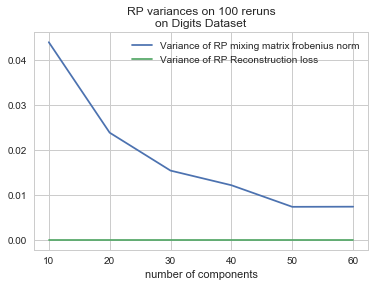

In [2]:
rp(solver.digits, None, main=False, comp_runs=True, reruns=100, cs=[10, 20, 30, 40, 50, 60])

For digits, the reconstruction loss variance is constantly zero, showing that the reconstruction is similarly biased across each randomised projection. The matrix norm variance continues to drop with higher number of components, meaning that the projections become increasing similar (homogeneous) with more components introduced, because a similar (small difference norm) pair of projection matrices would numerically compute similar projections.

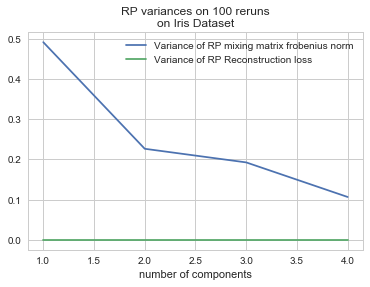

In [4]:
rp(solver.iris, None, main=False, comp_runs=True, reruns=100, cs=[1, 2, 3, 4])

For iris, ths result is similar, with matrix norm variance decreasing and reconstruction loss variance being unchanged across components.

**NMF**: This is in a way similar to PCA in terms of matrix factorisation, but then it composes of two matrices with no negative-numbered elements whose matix product restores the target matrix in terms of minising their difference norm. A feature of NMF is for applications where negative weights on feature elements do not make sense, like counts of words on a document.

0.3 of components are 19 components


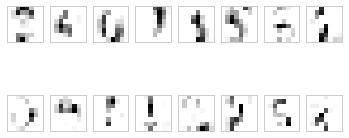

In [2]:
nmf(solver.digits, 0.3, use_components_percent=True, vis_components=True)
# nmf(solver.digits, 0.5, use_components_percent=True, vis_components=True)
# nmf(solver.digits, 0.7, use_components_percent=True, vis_components=True)

NMF components on digits is visualised as above, surprising the images look clear in the background and distinctive in the foreground digit fragments (loops, straight edges, S-shapes), to become a method to generate more interpretable components than PCA and ICA did.

**Reconstruction loss**: Finally the reconstruction loss of PCA, RP and NMF are plotted along increasing number of components, as one piece of evidence on how efficient the dimensionality reduction are.

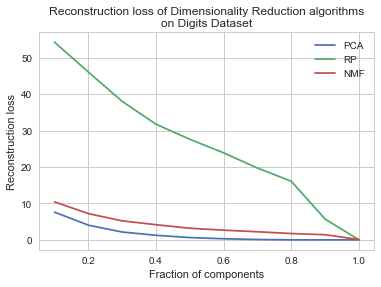

In [3]:
dr(solver.digits, comp_dr=True, cs=np.linspace(0.1, 1, 10))

For digits, obviously RP did worst with a high loss, while PCA and NMF are rather ideal, with PCA winning slightly all along at a loss within 2 from 40% of components onwards. The algorithms converge to loss of 0 at 100% of components as expected.

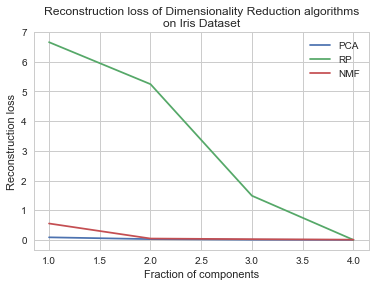

In [4]:
dr(solver.iris, comp_dr=True, cs=[1, 2, 3, 4], use_components_percent=False)

For iris, a very similar pattern is observed, but this time NMF pick up to coincide with PCA's low loss right at the second compoent. (Errata: x label is number of components, since there are only 4 for iris)

# Clustering reproduction on Dimensionality-reduced data

Having attempted both families of algorithms, we are to cross-over each of them to observe how would dimensionality-reduced data be clustered, and would it be better than just clustering as earlier.

The following figures except the last read: for each of dimensionality reduction, the visualisation of KMeans and EM on the transformed data.

A fixed **40%** of components are selected from dimensionality reduction, then passed over to clustering.

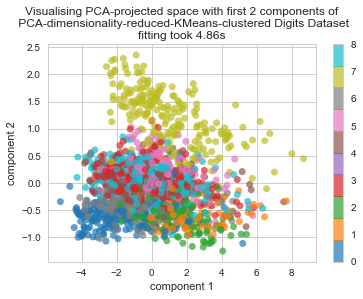

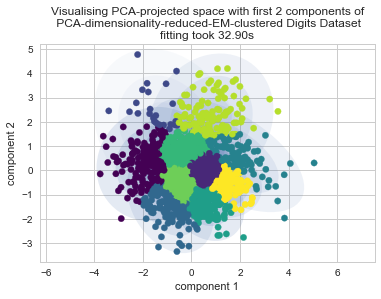

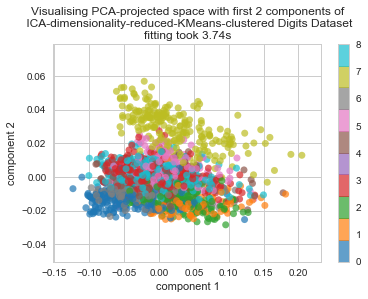

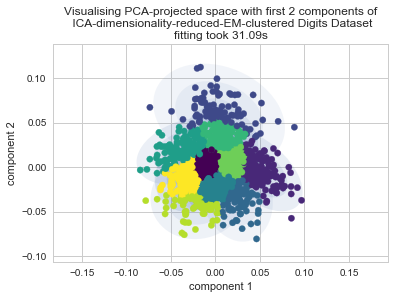

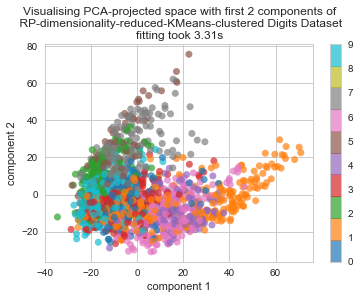

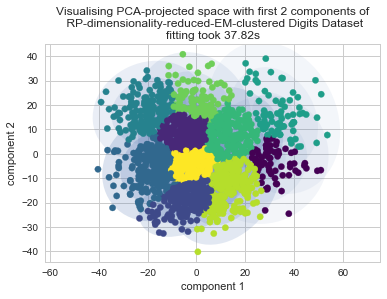

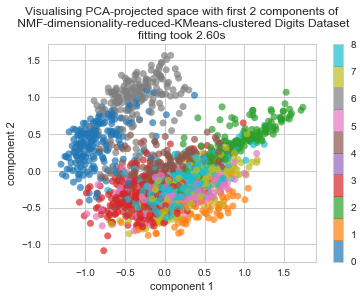

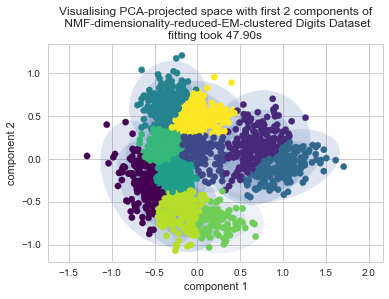

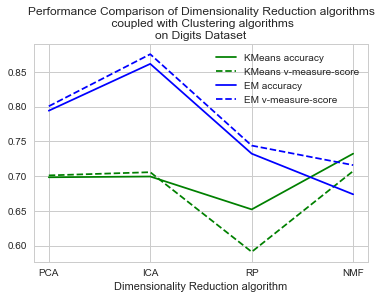

In [2]:
cluster_dr(solver.digits, 0.4, vis_cluster=True)

For digits, we generally see a different clustering by KMeans here than in the pure KMeans case; clustering are more similar with pure EM for the EM case. In KMeans, PCA and ICA return similar clusters, and NMF and RP return another pair of similarly shaped clusters, where NMF also gives a separation gap for digits `0` and `6` from the rest. This is because KMeans used most of the dimensions (features) to provide a clustering in the first place, but soft clustering works better by incorporating probabilities to smoothen the effect of losing out features.

The final plot gives a summary of clustering quality in terms of accuracy (between target and cluster assignment) and v-measure-score: a score that rewards clustering that assigns only the same class of examples to a cluster, and a same cluster for all examples of a class. A higher score can depict higher general clustering quality.

ICA with EM performed best on both metrics, attaining 86% accuracy and the highest v-measure-score. On KMeans, NMF has the highest accuracy and PCA, ICA and NMF have similar v-measure-score. Overall, ICA with EM is preferred given long enough running time, otherwise NMF is seen as a good choice with KMeans.

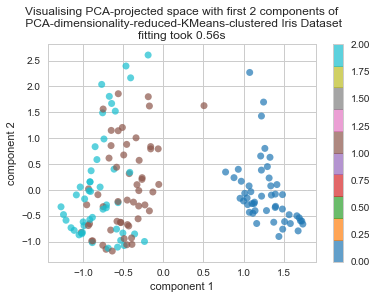

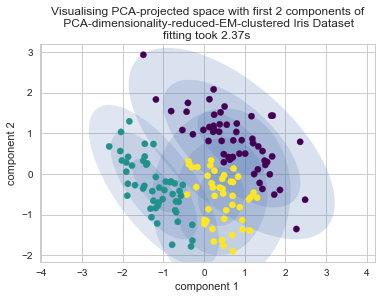

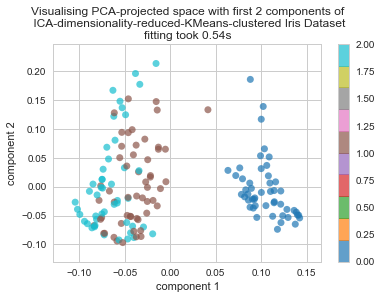

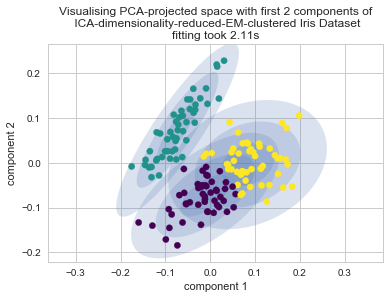

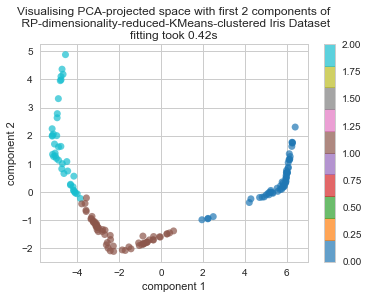

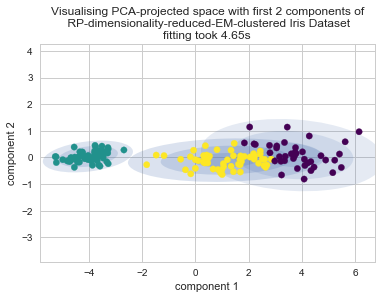

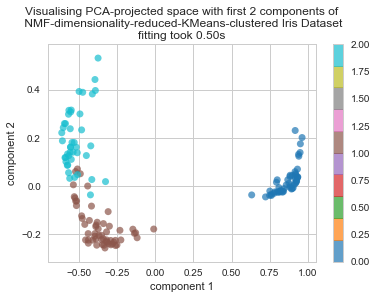

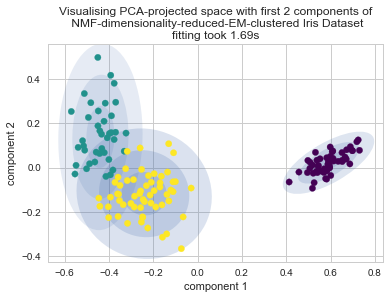

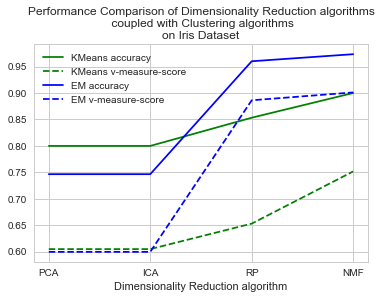

In [3]:
cluster_dr(solver.iris, 3, vis_cluster=True, use_components_percent=False)

For iris on KMeans, PCA and ICA gives completely different clusters than the pure KMeans method, while RP and NMF have higher resemblance with the previous cluster. PCA and ICA appears to capture the same components in this case, resulting in identical clusters. RP clusters line up as line fragments instead of spreading out.

For iris on EM, the 4 algorithms give completely different clusters compared with the pure EM approach.

NMF wins in both Accuracy and v-measure-score throughout KMeans and EM, suggesting that nonnegative weights help with representing iris features better than other feature transformations.

# Neural Network on Dimensionality-reduced data

Next, we pipe the dimensionality-reduced data to a neural network and investigate how different its performance is with Assignment 1. Incorporating feedback from Assignment 2, we also vary across problem size - in this case that is the number of components to use for dimensionality reduction, in terms of fraction. Test-time accuracy is plotted across components.

A neural network model very similar to Assignment 1 is used:

- 5 hidden layers each of 100 units
- learning rate of 0.001
- ReLu activation

A few enhancement is made to help with training

- Maximum number of iteration of 5000
- lbfgs solver

Specifically, the Digits dataset is chosen to be the dataset to run on, in order to provide greater complexity (than the iris dataset).

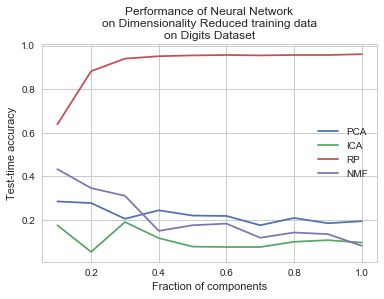

In [3]:
dr(solver.digits, to_nn=True, cs=np.linspace(0.1, 1, 10), use_components_percent=True)

The speed is not particularly made faster, since dimensionality reduction itself is a subroutine that requires computational overhead. Empirically speaking, RP performs the best, with a non-decreasing accuracy curve that leads to close to 95% test accuracy at last, recovering most of the 98% from Assignment 1. On the other hand, PCA, ICA and NMF fail quite badly to linger around getting 20-30% accurate. This suggests that at high dimensions, randomised projection would be useful to derive useful features for training a neural network, yet the other 3 methods appear to provide features that the neural network cannot pick up and utilise, leading to unsatisfactory accruacies.

# Neural Network on Clustered data after Dimensionality Reduction

This part has not been completed due to time constraints.

In [ ]:
cluster_dr(solver.digits, 0.4, to_nn=True, use_components_percent=True, cs=np.linspace(0.1, 1, 10))

In [ ]:
dataset = solver.digits
use_components_percent = True
cs = np.linspace(0.1, 1, 10)

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.3, shuffle=True)
train_dataset = Dataset(X_train, y_train, dataset.C, dataset.F, dataset.N, dataset.target_names)
test_dataset = Dataset(X_test, y_test, dataset.C, dataset.F, dataset.N, dataset.target_names)


dimreduced_train_datasets = [
  [Dataset(pca(train_dataset, c, use_components_percent=True, return_dimreduced=True), train_dataset.target, 
           dataset.C, dataset.F, int(dataset.N * 0.7), dataset.name, dataset.target_names) for c in cs],
  [Dataset(ica(train_dataset, c, use_components_percent=True, return_dimreduced=True), train_dataset.target, 
           dataset.C, dataset.F, int(dataset.N * 0.7), dataset.name, dataset.target_names) for c in cs],
  [Dataset(rp(train_dataset, c, use_components_percent=True, return_dimreduced=True), train_dataset.target, 
           dataset.C, dataset.F, int(dataset.N * 0.7), dataset.name, dataset.target_names) for c in cs],
  [Dataset(nmf(train_dataset, c, use_components_percent=True, return_dimreduced=True), train_dataset.target, 
           dataset.C, dataset.F, int(dataset.N * 0.7), dataset.name, dataset.target_names) for c in cs]
]

aug_train_datasets = [
  (kmeans(_train_dataset, return_aug_data=True), em(_train_dataset, return_aug_data=True)) for train_datasets_per_dr in dimreduced_train_datasets for _train_dataset in train_datasets_per_dr
]

dimreduced_test_drs = [
  [np.hstack([pca(test_dataset, c, use_components_percent=use_components_percent, return_dimreduced=True), 
              np.ones(int(dataset.N * 0.3)+1)[:, np.newaxis]]) for c in cs],
  [np.hstack([ica(test_dataset, c, use_components_percent=use_components_percent, return_dimreduced=True),
              np.ones(int(dataset.N * 0.3)+1)[:, np.newaxis]]) for c in cs],
  [np.hstack([rp(test_dataset, c, use_components_percent=use_components_percent, return_dimreduced=True),
              np.ones(int(dataset.N * 0.3)+1)[:, np.newaxis]]) for c in cs],
  [np.hstack([nmf(test_dataset, c, use_components_percent=use_components_percent, return_dimreduced=True),
              np.ones(int(dataset.N * 0.3)+1)[:, np.newaxis]]) for c in cs]
]

accs_drs = [
  ([], []),
  ([], []),
  ([], []),
  ([], [])
]
dr_names = [
  ('PCA-KMeans', 'PCA-EM'), 
  ('ICA-KMeans', 'ICA-EM'),
  ('RP-KMeans', 'RP-EM'),
  ('NMF-KMeans', 'NMF-EM')
]
fmts = [
  ('b-', 'b--'),
  ('g-', 'g--'),
  ('r-', 'r--'),
  ('c-', 'c--')
]

In [ ]:
print(len(aug_train_datasets), len(aug_train_datasets[0]), len(aug_train_datasets[0][0]), len(aug_train_datasets[0][0][0]))

In [ ]:
for idx_dr, (aug_train_dataset, dimreduced_test_components) in enumerate(zip(aug_train_datasets, dimreduced_test_drs)):
    for idx_clusterer in range(2):
        for idx_component in range(len(aug_train_dataset[idx_clusterer])):
            # np.full((5, ), 100
            nn = MLPClassifier(hidden_layer_sizes=[100, 100, 100, 100, 100], learning_rate_init=0.001, max_iter=5000,
                              solver='lbfgs', activation='relu')
            # scaler = StandardScaler()
            # scaler.fit(dimreduced_train_components[idx_component])
            # nn.fit(scaler.transform(dimreduced_train_components[idx_component]), train_dataset.target)
            nn.fit(aug_train_dataset[idx_clusterer], train_dataset.target)

            # acc = nn.score(scaler.transform(dimreduced_test_components[idx_component]), test_dataset.target)
            acc = nn.score(dimreduced_test_components[idx_component], test_dataset.target)
            accs_drs[idx_clusterer][idx_dr].append(acc)
        # print(accs_drs[idx_dr])
        
    for idx_dr in range(len(accs_drs)):
        for idx_clusterer in range(2):
            plt.plot(cs, accs_drs[idx_dr][idx_clusterer], fmts[idx_dr][idx_clusterer], label=dr_names[idx_dr][idx_clusterer])
    plt.legend()
    plt.title(f'Performance of Neural Network\non Dimensionality Reduced training data augmented with clustering feature\non {dataset.name} Dataset')
    plt.xlabel('Fraction of components')
    plt.ylabel('Test-time accuracy')
    plt.show()

# Conclusion

All in all, the clustering algorithms KMeans and EM have different strengths and the trade off is on running time versus clustering quality. They are both proved to be useful methods for visualising a dataset for exploratory data analysis. The dimensionality reduction algorithms also demonstrate relative strengths:

- PCA is fast (usually 4s), and useful for visualisation in particular, moderately good
- ICA extracts useful features in general for the purpose of clustering, but is slow (range of around 12s to 90s depending on number of components)
- RP is also fast, and in the use case of neural network provides the most compatible feature for this particular kind of model to learn
- NMF extracts the most visually interpretable feature for some domains (like images and here, handwritten digits), as well as the most utilisable transformed basis features for clustering to act upon, traded off again by running time that is comparably long as ICA

The sufficiency condition provided by domain knowledge cannot be emphasised more. The choice of clustering and dimensionality reduction algorithm in a particular dataset has to be biased towards the dataset's requirements. While the exploration could be time-consuming, once it is identified and reasoned through, those methods become sound and ready tools to give enhanced description of the data.